In [269]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [270]:
# Load the dataset
df = pd.read_csv("Zomato data .csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [271]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [272]:
df.info()   #there is not null value in the dataset but there data type of 1 columns is not correct.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [273]:
#convert 'rate' column to numeric. and change the data type to float
df['rate'] = df['rate'].str.replace('/5','').astype(float)

In [274]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [276]:
df.describe()  #to get the statistical summary of the dataset

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


### Questions

Ques.1 What type of restaurant do the majority of customers order from?

In [277]:
Type_of_Restaurant  = df['listed_in(type)'].value_counts()  #to get the count of unique values in 'listed_in' column
print(Type_of_Restaurant)

listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64


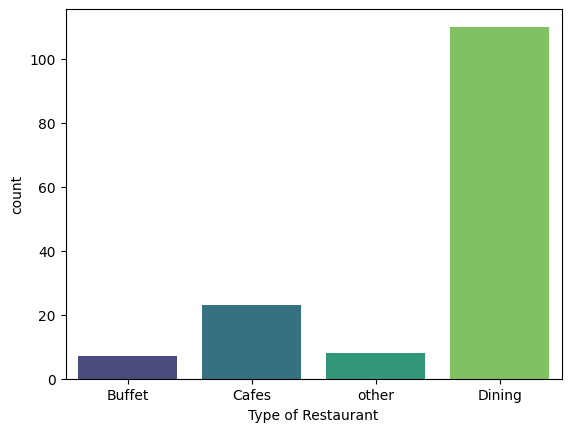

<Figure size 500x1200 with 0 Axes>

In [324]:
sns.countplot(x = df['listed_in(type)'], palette='viridis',hue = df['listed_in(type)'])
plt.xlabel('Type of Restaurant')
plt.figure(figsize = (5, 12))
plt.show()

Ques.2 How many votes has each type of restaurant received from customers?

In [279]:
Votes_by_Type_of_Restaurant = df.groupby('listed_in(type)')['votes'].sum().reset_index()
Votes_by_Type_of_Restaurant

,listed_in(type),votes
0,Buffet,3028
1,Cafes,6434
2,Dining,20363
3,other,9367


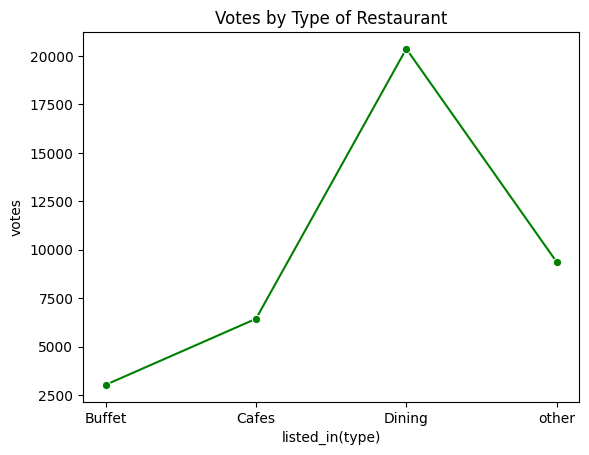

In [ ]:
sns.lineplot(x='listed_in(type)', y='votes', data= Votes_by_Type_of_Restaurant, marker='o',color = 'green')
plt.title('Votes by Type of Restaurant')
plt.show()

Ques.3 What are the ratings that the majority of restaurants have received?

In [281]:
Distribution_of_Ratings = df['rate'].value_counts().sort_values(ascending=False)
Distribution_of_Ratings

rate
3.8    20
3.7    15
3.3    14
3.4    12
4.1    11
3.6    11
4.0    10
3.9    10
4.2     8
3.2     7
3.1     7
2.9     7
3.5     6
3.0     2
4.6     2
2.8     2
4.4     2
4.3     1
2.6     1
Name: count, dtype: int64

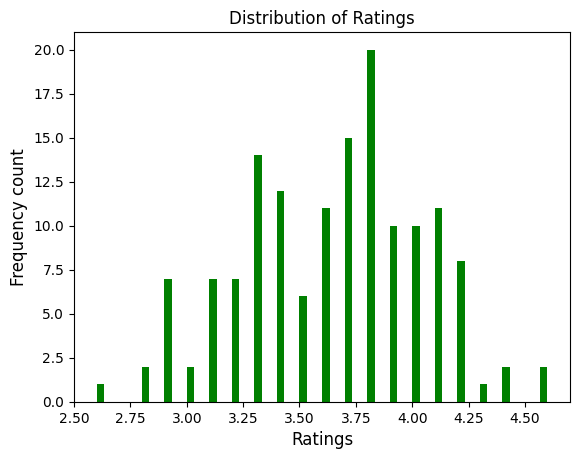

In [ ]:
plt.hist(df['rate'], bins = 60,color = 'green')
plt.title('Distribution of Ratings')
plt.xlabel('Ratings',size = 12)
plt.ylabel('Frequency count',size=12)
plt.show()

Ques.4 Zomato has observed that most couples order most of their food online. What is their average spending on each order?

In [283]:
average_spending = df[df['online_order'] == 'Yes']['approx_cost(for two people)'].mean()
print(average_spending)

510.3448275862069


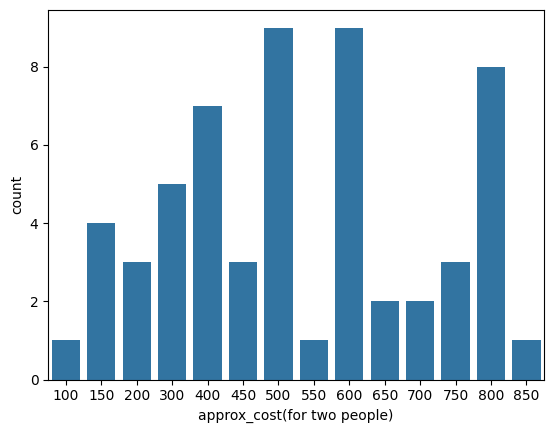

In [ ]:
couple_data = df[df['online_order'] == 'Yes']['approx_cost(for two people)']
sns.countplot(x=couple_data)


Ques.5 Which mode (online or offline) has received the maximum rating?

In [310]:
order_rating = df.groupby('online_order')['rate'].max().reset_index()
print(order_rating)

  online_order  rate
0           No   4.3
1          Yes   4.6


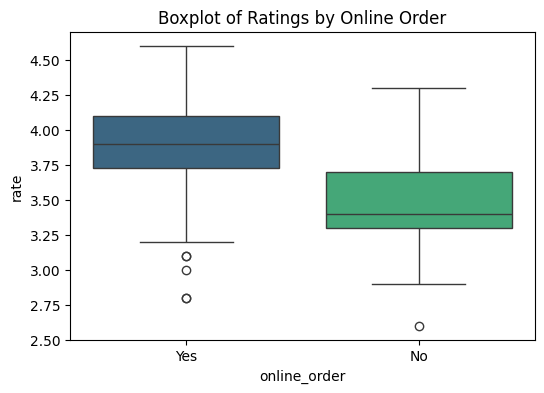

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x = 'online_order', y = 'rate', data = df, palette='viridis',hue = df['online_order'])
plt.savefig('boxplot_online_order.png', dpi=300)
plt.show()

Ques.6 Which type of restaurant received more offline orders, so that Zomato can provide those
customers with some good offers?

In [313]:

offline_orders = df[df['online_order'] == 'No']['listed_in(type)'].value_counts()

print(offline_orders)


listed_in(type)
Dining    77
Cafes      8
Buffet     3
other      2
Name: count, dtype: int64


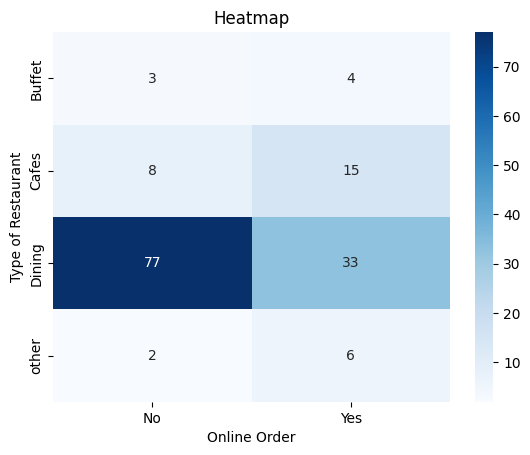

In [ ]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order',aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Type of Restaurant')
plt.show()